In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

1.14.0


In [7]:
import pandas as pd

In [8]:
dataset_path = "./dataset_mileage.csv"

In [17]:
column_names = ['time','mph','TIM','mpg_us']
# dataset = pd.read_csv(dataset_path, header=[1,2,3,4], squeeze = True)
# dataset = pd.read_csv(dataset_path, index_col="time", squeeze = True)
dataset = pd.read_csv(dataset_path, usecols=column_names, squeeze = True)
dataset.head()

,time,mph,TIM,mpg_us
0,0,108,9,0.0
1,3,185,15,6.3
2,12,122,27,2.9
3,19,94,3,3.8
4,26,56,14,3.4


In [24]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [23]:
test_dataset

,time,mph,TIM,mpg_us
9,48,105,15,3.4
25,146,63,1,7.7
28,160,84,1,8.4
31,174,129,5,8.6
32,180,42,1,8.7
...,...,...,...,...
472,2629,112,23,5.4
480,2678,171,16,5.4
481,2683,36,24,5.4
484,2694,141,24,5.4


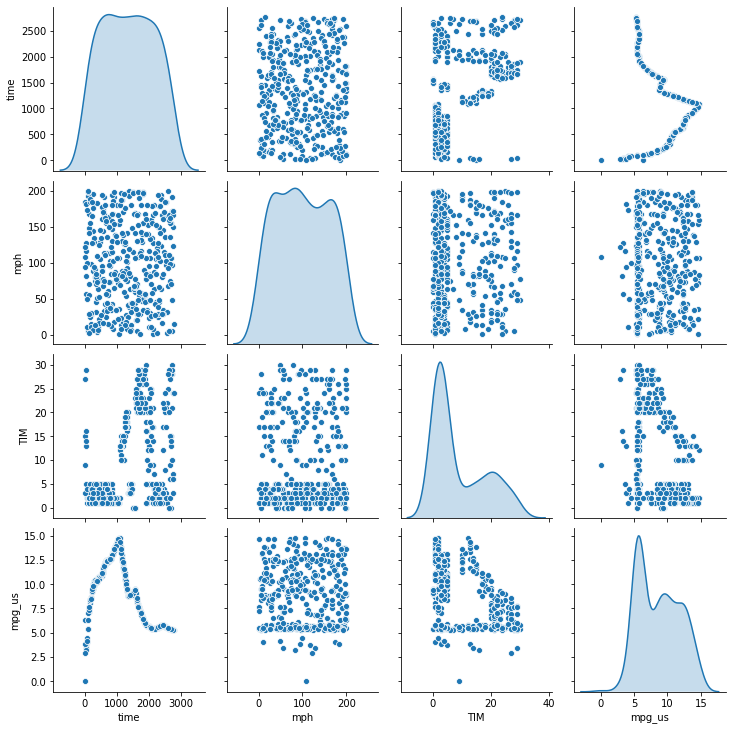

In [25]:
sns.pairplot(train_dataset[["time", "mph", "TIM", "mpg_us"]], diag_kind="kde")

In [26]:
train_stats = train_dataset.describe()
train_stats.pop("mpg_us")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
time,398.0,1358.042714,795.157935,0.0,680.5,1347.0,2031.0,2766.0
mph,398.0,100.143216,59.419502,1.0,47.0,97.0,154.0,200.0
TIM,398.0,9.055276,8.978954,0.0,2.0,4.0,17.0,30.0


In [27]:
train_labels = train_dataset.pop('mpg_us')
test_labels = test_dataset.pop('mpg_us')

In [28]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [29]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [30]:
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [32]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.05779015],
       [ 0.03944597],
       [ 0.00496124],
       [ 0.03146083],
       [ 0.04951997],
       [ 0.11967418],
       [ 0.04096232],
       [ 0.00271224],
       [-0.0416359 ],
       [ 0.08456044]], dtype=float32)

In [34]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Train on 318 samples, validate on 80 samples
Epoch 1/1000
318/318 [==============================] - 1s 2ms/sample - loss: 78.6040 - mean_absolute_error: 8.3021 - mean_squared_error: 78.6040 - val_loss: 68.9060 - val_mean_absolute_error: 7.7350 - val_mean_squared_error: 68.9060
Epoch 2/1000
318/318 [==============================] - 0s 113us/sample - loss: 66.7977 - mean_absolute_error: 7.5170 - mean_squared_error: 66.7977 - val_loss: 57.9616 - val_mean_absolute_error: 6.9820 - val_mean_squared_error: 57.9616
Epoch 3/1000
318/318 [==============================] - 0s 91us/sample - loss: 55.9433 - mean_absolute_error: 6.7262 - mean_squared_error: 55.9433 - val_loss: 46.9130 - val_mean_absolute_error: 6.1232 - val_mean_squared_error: 46.9130
Epoch 4/1000
318/318 [==============================] - 0s 97us/sample - loss: 45.2402 - mean_absolute_error: 5.8310 - mean_squared_error: 45.2402 - val_loss: 36.6324 - val_mean_absolute_error: 5.2048 - val_mean_squared_error: 36.6324
Epoch 5/1000
31

318/318 [==============================] - 0s 107us/sample - loss: 4.3161 - mean_absolute_error: 1.5221 - mean_squared_error: 4.3161 - val_loss: 4.4609 - val_mean_absolute_error: 1.4981 - val_mean_squared_error: 4.4609
Epoch 36/1000
318/318 [==============================] - 0s 129us/sample - loss: 4.0362 - mean_absolute_error: 1.4852 - mean_squared_error: 4.0362 - val_loss: 4.2315 - val_mean_absolute_error: 1.4586 - val_mean_squared_error: 4.2315
Epoch 37/1000
318/318 [==============================] - 0s 148us/sample - loss: 3.8418 - mean_absolute_error: 1.4665 - mean_squared_error: 3.8418 - val_loss: 4.0567 - val_mean_absolute_error: 1.4388 - val_mean_squared_error: 4.0567
Epoch 38/1000
318/318 [==============================] - 0s 85us/sample - loss: 3.5512 - mean_absolute_error: 1.3918 - mean_squared_error: 3.5512 - val_loss: 3.7894 - val_mean_absolute_error: 1.3938 - val_mean_squared_error: 3.7894
Epoch 39/1000
318/318 [==============================] - 0s 85us/sample - loss: 3.2

318/318 [==============================] - 0s 75us/sample - loss: 0.6700 - mean_absolute_error: 0.5832 - mean_squared_error: 0.6700 - val_loss: 1.1041 - val_mean_absolute_error: 0.7100 - val_mean_squared_error: 1.1041
Epoch 71/1000
318/318 [==============================] - 0s 72us/sample - loss: 0.6346 - mean_absolute_error: 0.5597 - mean_squared_error: 0.6346 - val_loss: 1.0930 - val_mean_absolute_error: 0.7152 - val_mean_squared_error: 1.0930
Epoch 72/1000
318/318 [==============================] - 0s 97us/sample - loss: 0.6174 - mean_absolute_error: 0.5632 - mean_squared_error: 0.6174 - val_loss: 1.1470 - val_mean_absolute_error: 0.7317 - val_mean_squared_error: 1.1470
Epoch 73/1000
318/318 [==============================] - 0s 72us/sample - loss: 0.6464 - mean_absolute_error: 0.5789 - mean_squared_error: 0.6464 - val_loss: 1.0265 - val_mean_absolute_error: 0.7046 - val_mean_squared_error: 1.0265
Epoch 74/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.5831

318/318 [==============================] - 0s 97us/sample - loss: 0.4288 - mean_absolute_error: 0.4396 - mean_squared_error: 0.4288 - val_loss: 0.7841 - val_mean_absolute_error: 0.6157 - val_mean_squared_error: 0.7841
Epoch 106/1000
318/318 [==============================] - 0s 97us/sample - loss: 0.4250 - mean_absolute_error: 0.4406 - mean_squared_error: 0.4250 - val_loss: 0.9239 - val_mean_absolute_error: 0.6006 - val_mean_squared_error: 0.9239
Epoch 107/1000
318/318 [==============================] - 0s 75us/sample - loss: 0.3985 - mean_absolute_error: 0.4245 - mean_squared_error: 0.3985 - val_loss: 0.7970 - val_mean_absolute_error: 0.5847 - val_mean_squared_error: 0.7970
Epoch 108/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.4270 - mean_absolute_error: 0.4377 - mean_squared_error: 0.4270 - val_loss: 0.7720 - val_mean_absolute_error: 0.5722 - val_mean_squared_error: 0.7720
Epoch 109/1000
318/318 [==============================] - 0s 75us/sample - loss: 0.

318/318 [==============================] - 0s 63us/sample - loss: 0.3296 - mean_absolute_error: 0.3950 - mean_squared_error: 0.3296 - val_loss: 0.5841 - val_mean_absolute_error: 0.5180 - val_mean_squared_error: 0.5841
Epoch 141/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.2940 - mean_absolute_error: 0.3783 - mean_squared_error: 0.2940 - val_loss: 0.7192 - val_mean_absolute_error: 0.5302 - val_mean_squared_error: 0.7192
Epoch 142/1000
318/318 [==============================] - 0s 60us/sample - loss: 0.3280 - mean_absolute_error: 0.3776 - mean_squared_error: 0.3280 - val_loss: 0.5650 - val_mean_absolute_error: 0.4828 - val_mean_squared_error: 0.5650
Epoch 143/1000
318/318 [==============================] - 0s 60us/sample - loss: 0.3230 - mean_absolute_error: 0.3815 - mean_squared_error: 0.3230 - val_loss: 0.5642 - val_mean_absolute_error: 0.4997 - val_mean_squared_error: 0.5642
Epoch 144/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.

318/318 [==============================] - 0s 97us/sample - loss: 0.2388 - mean_absolute_error: 0.3360 - mean_squared_error: 0.2388 - val_loss: 0.5071 - val_mean_absolute_error: 0.4945 - val_mean_squared_error: 0.5071
Epoch 176/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.2425 - mean_absolute_error: 0.3442 - mean_squared_error: 0.2425 - val_loss: 0.5177 - val_mean_absolute_error: 0.4634 - val_mean_squared_error: 0.5177
Epoch 177/1000
318/318 [==============================] - 0s 97us/sample - loss: 0.2448 - mean_absolute_error: 0.3563 - mean_squared_error: 0.2448 - val_loss: 0.5202 - val_mean_absolute_error: 0.4214 - val_mean_squared_error: 0.5202
Epoch 178/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.2887 - mean_absolute_error: 0.3615 - mean_squared_error: 0.2887 - val_loss: 0.4401 - val_mean_absolute_error: 0.4456 - val_mean_squared_error: 0.4401
Epoch 179/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.

318/318 [==============================] - 0s 88us/sample - loss: 0.2143 - mean_absolute_error: 0.3353 - mean_squared_error: 0.2143 - val_loss: 0.4454 - val_mean_absolute_error: 0.4288 - val_mean_squared_error: 0.4454
Epoch 211/1000
318/318 [==============================] - 0s 110us/sample - loss: 0.2384 - mean_absolute_error: 0.3527 - mean_squared_error: 0.2384 - val_loss: 0.4279 - val_mean_absolute_error: 0.3847 - val_mean_squared_error: 0.4279
Epoch 212/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.2488 - mean_absolute_error: 0.3437 - mean_squared_error: 0.2488 - val_loss: 0.4719 - val_mean_absolute_error: 0.5176 - val_mean_squared_error: 0.4719
Epoch 213/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.2117 - mean_absolute_error: 0.3160 - mean_squared_error: 0.2117 - val_loss: 0.3999 - val_mean_absolute_error: 0.4359 - val_mean_squared_error: 0.3999
Epoch 214/1000
318/318 [==============================] - 0s 82us/sample - loss: 0

318/318 [==============================] - 0s 123us/sample - loss: 0.2174 - mean_absolute_error: 0.3400 - mean_squared_error: 0.2174 - val_loss: 0.3704 - val_mean_absolute_error: 0.4092 - val_mean_squared_error: 0.3704
Epoch 246/1000
318/318 [==============================] - 0s 126us/sample - loss: 0.1722 - mean_absolute_error: 0.2892 - mean_squared_error: 0.1722 - val_loss: 0.3598 - val_mean_absolute_error: 0.3557 - val_mean_squared_error: 0.3598
Epoch 247/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.2074 - mean_absolute_error: 0.3184 - mean_squared_error: 0.2074 - val_loss: 0.3831 - val_mean_absolute_error: 0.4442 - val_mean_squared_error: 0.3831
Epoch 248/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.2027 - mean_absolute_error: 0.3320 - mean_squared_error: 0.2027 - val_loss: 0.3598 - val_mean_absolute_error: 0.4286 - val_mean_squared_error: 0.3598
Epoch 249/1000
318/318 [==============================] - 0s 88us/sample - loss: 

318/318 [==============================] - 0s 88us/sample - loss: 0.2076 - mean_absolute_error: 0.3339 - mean_squared_error: 0.2076 - val_loss: 0.3318 - val_mean_absolute_error: 0.3476 - val_mean_squared_error: 0.3318
Epoch 281/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.2055 - mean_absolute_error: 0.3147 - mean_squared_error: 0.2055 - val_loss: 0.3387 - val_mean_absolute_error: 0.4242 - val_mean_squared_error: 0.3387
Epoch 282/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1644 - mean_absolute_error: 0.2960 - mean_squared_error: 0.1644 - val_loss: 0.2961 - val_mean_absolute_error: 0.3431 - val_mean_squared_error: 0.2961
Epoch 283/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1978 - mean_absolute_error: 0.3185 - mean_squared_error: 0.1978 - val_loss: 0.4369 - val_mean_absolute_error: 0.4240 - val_mean_squared_error: 0.4369
Epoch 284/1000
318/318 [==============================] - 0s 101us/sample - loss: 0

318/318 [==============================] - 0s 101us/sample - loss: 0.1496 - mean_absolute_error: 0.2841 - mean_squared_error: 0.1496 - val_loss: 0.3875 - val_mean_absolute_error: 0.4183 - val_mean_squared_error: 0.3875
Epoch 316/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.1857 - mean_absolute_error: 0.3207 - mean_squared_error: 0.1857 - val_loss: 0.2725 - val_mean_absolute_error: 0.3518 - val_mean_squared_error: 0.2725
Epoch 317/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.1773 - mean_absolute_error: 0.2923 - mean_squared_error: 0.1773 - val_loss: 0.2802 - val_mean_absolute_error: 0.3375 - val_mean_squared_error: 0.2802
Epoch 318/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1660 - mean_absolute_error: 0.2903 - mean_squared_error: 0.1660 - val_loss: 0.2769 - val_mean_absolute_error: 0.3477 - val_mean_squared_error: 0.2769
Epoch 319/1000
318/318 [==============================] - 0s 91us/sample - loss: 0

318/318 [==============================] - 0s 66us/sample - loss: 0.2202 - mean_absolute_error: 0.3272 - mean_squared_error: 0.2202 - val_loss: 0.2533 - val_mean_absolute_error: 0.3110 - val_mean_squared_error: 0.2533
Epoch 351/1000
318/318 [==============================] - 0s 57us/sample - loss: 0.1329 - mean_absolute_error: 0.2539 - mean_squared_error: 0.1329 - val_loss: 0.3655 - val_mean_absolute_error: 0.3733 - val_mean_squared_error: 0.3655
Epoch 352/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.1566 - mean_absolute_error: 0.2954 - mean_squared_error: 0.1566 - val_loss: 0.2490 - val_mean_absolute_error: 0.3413 - val_mean_squared_error: 0.2490
Epoch 353/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.1711 - mean_absolute_error: 0.3112 - mean_squared_error: 0.1711 - val_loss: 0.2400 - val_mean_absolute_error: 0.3133 - val_mean_squared_error: 0.2400
Epoch 354/1000
318/318 [==============================] - 0s 60us/sample - loss: 0.

318/318 [==============================] - 0s 82us/sample - loss: 0.1737 - mean_absolute_error: 0.3029 - mean_squared_error: 0.1737 - val_loss: 0.2633 - val_mean_absolute_error: 0.3022 - val_mean_squared_error: 0.2633
Epoch 386/1000
318/318 [==============================] - 0s 69us/sample - loss: 0.1616 - mean_absolute_error: 0.2973 - mean_squared_error: 0.1616 - val_loss: 0.2355 - val_mean_absolute_error: 0.3348 - val_mean_squared_error: 0.2355
Epoch 387/1000
318/318 [==============================] - 0s 60us/sample - loss: 0.1344 - mean_absolute_error: 0.2675 - mean_squared_error: 0.1344 - val_loss: 0.2452 - val_mean_absolute_error: 0.3511 - val_mean_squared_error: 0.2452
Epoch 388/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.1983 - mean_absolute_error: 0.3418 - mean_squared_error: 0.1983 - val_loss: 0.2222 - val_mean_absolute_error: 0.3127 - val_mean_squared_error: 0.2222
Epoch 389/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.

318/318 [==============================] - 0s 97us/sample - loss: 0.1266 - mean_absolute_error: 0.2582 - mean_squared_error: 0.1266 - val_loss: 0.3164 - val_mean_absolute_error: 0.3811 - val_mean_squared_error: 0.3164
Epoch 421/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.1402 - mean_absolute_error: 0.2701 - mean_squared_error: 0.1402 - val_loss: 0.2278 - val_mean_absolute_error: 0.3473 - val_mean_squared_error: 0.2278
Epoch 422/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1748 - mean_absolute_error: 0.3074 - mean_squared_error: 0.1748 - val_loss: 0.2214 - val_mean_absolute_error: 0.3254 - val_mean_squared_error: 0.2214
Epoch 423/1000
318/318 [==============================] - 0s 75us/sample - loss: 0.1286 - mean_absolute_error: 0.2665 - mean_squared_error: 0.1286 - val_loss: 0.2388 - val_mean_absolute_error: 0.3523 - val_mean_squared_error: 0.2388
Epoch 424/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.

318/318 [==============================] - 0s 63us/sample - loss: 0.1571 - mean_absolute_error: 0.2877 - mean_squared_error: 0.1571 - val_loss: 0.2016 - val_mean_absolute_error: 0.3203 - val_mean_squared_error: 0.2016
Epoch 456/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.1284 - mean_absolute_error: 0.2552 - mean_squared_error: 0.1284 - val_loss: 0.2176 - val_mean_absolute_error: 0.3355 - val_mean_squared_error: 0.2176
Epoch 457/1000
318/318 [==============================] - 0s 94us/sample - loss: 0.1171 - mean_absolute_error: 0.2535 - mean_squared_error: 0.1171 - val_loss: 0.3183 - val_mean_absolute_error: 0.4602 - val_mean_squared_error: 0.3183
Epoch 458/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1616 - mean_absolute_error: 0.3011 - mean_squared_error: 0.1616 - val_loss: 0.2341 - val_mean_absolute_error: 0.3473 - val_mean_squared_error: 0.2341
Epoch 459/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.

318/318 [==============================] - 0s 75us/sample - loss: 0.1088 - mean_absolute_error: 0.2346 - mean_squared_error: 0.1088 - val_loss: 0.1892 - val_mean_absolute_error: 0.2981 - val_mean_squared_error: 0.1892
Epoch 491/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1677 - mean_absolute_error: 0.3042 - mean_squared_error: 0.1677 - val_loss: 0.1837 - val_mean_absolute_error: 0.2910 - val_mean_squared_error: 0.1837
Epoch 492/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1246 - mean_absolute_error: 0.2543 - mean_squared_error: 0.1246 - val_loss: 0.3176 - val_mean_absolute_error: 0.3773 - val_mean_squared_error: 0.3176
Epoch 493/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1138 - mean_absolute_error: 0.2446 - mean_squared_error: 0.1138 - val_loss: 0.1870 - val_mean_absolute_error: 0.3007 - val_mean_squared_error: 0.1870
Epoch 494/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.

318/318 [==============================] - 0s 63us/sample - loss: 0.1089 - mean_absolute_error: 0.2432 - mean_squared_error: 0.1089 - val_loss: 0.1950 - val_mean_absolute_error: 0.2711 - val_mean_squared_error: 0.1950
Epoch 526/1000
318/318 [==============================] - 0s 60us/sample - loss: 0.1430 - mean_absolute_error: 0.2926 - mean_squared_error: 0.1430 - val_loss: 0.1767 - val_mean_absolute_error: 0.2812 - val_mean_squared_error: 0.1767
Epoch 527/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.1089 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1089 - val_loss: 0.1754 - val_mean_absolute_error: 0.2897 - val_mean_squared_error: 0.1754
Epoch 528/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.1510 - mean_absolute_error: 0.2573 - mean_squared_error: 0.1510 - val_loss: 0.1847 - val_mean_absolute_error: 0.2944 - val_mean_squared_error: 0.1847
Epoch 529/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.

318/318 [==============================] - 0s 82us/sample - loss: 0.1291 - mean_absolute_error: 0.2672 - mean_squared_error: 0.1291 - val_loss: 0.1839 - val_mean_absolute_error: 0.2989 - val_mean_squared_error: 0.1839
Epoch 561/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1126 - mean_absolute_error: 0.2605 - mean_squared_error: 0.1126 - val_loss: 0.1977 - val_mean_absolute_error: 0.3182 - val_mean_squared_error: 0.1977
Epoch 562/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.1020 - mean_absolute_error: 0.2352 - mean_squared_error: 0.1020 - val_loss: 0.1645 - val_mean_absolute_error: 0.2677 - val_mean_squared_error: 0.1645
Epoch 563/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1534 - mean_absolute_error: 0.2860 - mean_squared_error: 0.1534 - val_loss: 0.1773 - val_mean_absolute_error: 0.2654 - val_mean_squared_error: 0.1773
Epoch 564/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.

Epoch 595/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1339 - mean_absolute_error: 0.2683 - mean_squared_error: 0.1339 - val_loss: 0.2198 - val_mean_absolute_error: 0.3075 - val_mean_squared_error: 0.2198
Epoch 596/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1050 - mean_absolute_error: 0.2414 - mean_squared_error: 0.1050 - val_loss: 0.1687 - val_mean_absolute_error: 0.2901 - val_mean_squared_error: 0.1687
Epoch 597/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.1087 - mean_absolute_error: 0.2505 - mean_squared_error: 0.1087 - val_loss: 0.1624 - val_mean_absolute_error: 0.2644 - val_mean_squared_error: 0.1624
Epoch 598/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.1499 - mean_absolute_error: 0.2876 - mean_squared_error: 0.1499 - val_loss: 0.2590 - val_mean_absolute_error: 0.3465 - val_mean_squared_error: 0.2590
Epoch 599/1000
318/318 [==============================] - 0s 79us/sa

318/318 [==============================] - 0s 97us/sample - loss: 0.0844 - mean_absolute_error: 0.2223 - mean_squared_error: 0.0844 - val_loss: 0.2046 - val_mean_absolute_error: 0.3003 - val_mean_squared_error: 0.2046
Epoch 631/1000
318/318 [==============================] - 0s 104us/sample - loss: 0.1269 - mean_absolute_error: 0.2582 - mean_squared_error: 0.1269 - val_loss: 0.4059 - val_mean_absolute_error: 0.4498 - val_mean_squared_error: 0.4059
Epoch 632/1000
318/318 [==============================] - 0s 101us/sample - loss: 0.1197 - mean_absolute_error: 0.2573 - mean_squared_error: 0.1197 - val_loss: 0.2324 - val_mean_absolute_error: 0.3458 - val_mean_squared_error: 0.2324
Epoch 633/1000
318/318 [==============================] - 0s 101us/sample - loss: 0.1098 - mean_absolute_error: 0.2551 - mean_squared_error: 0.1098 - val_loss: 0.2384 - val_mean_absolute_error: 0.3606 - val_mean_squared_error: 0.2384
Epoch 634/1000
318/318 [==============================] - 0s 104us/sample - loss

Epoch 665/1000
318/318 [==============================] - 0s 123us/sample - loss: 0.1055 - mean_absolute_error: 0.2343 - mean_squared_error: 0.1055 - val_loss: 0.1593 - val_mean_absolute_error: 0.2651 - val_mean_squared_error: 0.1593
Epoch 666/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.1244 - mean_absolute_error: 0.2685 - mean_squared_error: 0.1244 - val_loss: 0.1976 - val_mean_absolute_error: 0.2947 - val_mean_squared_error: 0.1976
Epoch 667/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.0864 - mean_absolute_error: 0.2144 - mean_squared_error: 0.0864 - val_loss: 0.2036 - val_mean_absolute_error: 0.2981 - val_mean_squared_error: 0.2036
Epoch 668/1000
318/318 [==============================] - 0s 94us/sample - loss: 0.1298 - mean_absolute_error: 0.2708 - mean_squared_error: 0.1298 - val_loss: 0.2017 - val_mean_absolute_error: 0.2791 - val_mean_squared_error: 0.2017
Epoch 669/1000
318/318 [==============================] - 0s 75us/s

318/318 [==============================] - 0s 72us/sample - loss: 0.0947 - mean_absolute_error: 0.2265 - mean_squared_error: 0.0947 - val_loss: 0.1804 - val_mean_absolute_error: 0.2948 - val_mean_squared_error: 0.1804
Epoch 701/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.0967 - mean_absolute_error: 0.2301 - mean_squared_error: 0.0967 - val_loss: 0.2853 - val_mean_absolute_error: 0.4227 - val_mean_squared_error: 0.2853
Epoch 702/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.1200 - mean_absolute_error: 0.2674 - mean_squared_error: 0.1200 - val_loss: 0.1942 - val_mean_absolute_error: 0.3110 - val_mean_squared_error: 0.1942
Epoch 703/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.1212 - mean_absolute_error: 0.2514 - mean_squared_error: 0.1212 - val_loss: 0.1603 - val_mean_absolute_error: 0.2611 - val_mean_squared_error: 0.1603
Epoch 704/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.

Epoch 735/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1156 - mean_absolute_error: 0.2620 - mean_squared_error: 0.1156 - val_loss: 0.1771 - val_mean_absolute_error: 0.2677 - val_mean_squared_error: 0.1771
Epoch 736/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.0982 - mean_absolute_error: 0.2312 - mean_squared_error: 0.0982 - val_loss: 0.2239 - val_mean_absolute_error: 0.3510 - val_mean_squared_error: 0.2239
Epoch 737/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.0962 - mean_absolute_error: 0.2332 - mean_squared_error: 0.0962 - val_loss: 0.2222 - val_mean_absolute_error: 0.3424 - val_mean_squared_error: 0.2222
Epoch 738/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.1382 - mean_absolute_error: 0.2676 - mean_squared_error: 0.1382 - val_loss: 0.1650 - val_mean_absolute_error: 0.2579 - val_mean_squared_error: 0.1650
Epoch 739/1000
318/318 [==============================] - 0s 91us/sa

Epoch 770/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.0934 - mean_absolute_error: 0.2314 - mean_squared_error: 0.0934 - val_loss: 0.3357 - val_mean_absolute_error: 0.3922 - val_mean_squared_error: 0.3357
Epoch 771/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.0861 - mean_absolute_error: 0.2144 - mean_squared_error: 0.0861 - val_loss: 0.2057 - val_mean_absolute_error: 0.3345 - val_mean_squared_error: 0.2057
Epoch 772/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.1271 - mean_absolute_error: 0.2578 - mean_squared_error: 0.1271 - val_loss: 0.1696 - val_mean_absolute_error: 0.2773 - val_mean_squared_error: 0.1696
Epoch 773/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.0918 - mean_absolute_error: 0.2310 - mean_squared_error: 0.0918 - val_loss: 0.1559 - val_mean_absolute_error: 0.2540 - val_mean_squared_error: 0.1559
Epoch 774/1000
318/318 [==============================] - 0s 79us/sa

318/318 [==============================] - 0s 72us/sample - loss: 0.0912 - mean_absolute_error: 0.2254 - mean_squared_error: 0.0912 - val_loss: 0.3432 - val_mean_absolute_error: 0.4157 - val_mean_squared_error: 0.3432
Epoch 806/1000
318/318 [==============================] - 0s 97us/sample - loss: 0.1215 - mean_absolute_error: 0.2575 - mean_squared_error: 0.1215 - val_loss: 0.2203 - val_mean_absolute_error: 0.3009 - val_mean_squared_error: 0.2203
Epoch 807/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.1062 - mean_absolute_error: 0.2384 - mean_squared_error: 0.1062 - val_loss: 0.2065 - val_mean_absolute_error: 0.3211 - val_mean_squared_error: 0.2065
Epoch 808/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.1063 - mean_absolute_error: 0.2364 - mean_squared_error: 0.1063 - val_loss: 0.1479 - val_mean_absolute_error: 0.2537 - val_mean_squared_error: 0.1479
Epoch 809/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.

318/318 [==============================] - 0s 120us/sample - loss: 0.1014 - mean_absolute_error: 0.2399 - mean_squared_error: 0.1014 - val_loss: 0.2408 - val_mean_absolute_error: 0.3388 - val_mean_squared_error: 0.2408
Epoch 841/1000
318/318 [==============================] - 0s 116us/sample - loss: 0.1027 - mean_absolute_error: 0.2315 - mean_squared_error: 0.1027 - val_loss: 0.1826 - val_mean_absolute_error: 0.3006 - val_mean_squared_error: 0.1826
Epoch 842/1000
318/318 [==============================] - 0s 120us/sample - loss: 0.0891 - mean_absolute_error: 0.2206 - mean_squared_error: 0.0891 - val_loss: 0.3060 - val_mean_absolute_error: 0.3864 - val_mean_squared_error: 0.3060
Epoch 843/1000
318/318 [==============================] - 0s 85us/sample - loss: 0.0989 - mean_absolute_error: 0.2386 - mean_squared_error: 0.0989 - val_loss: 0.3402 - val_mean_absolute_error: 0.3941 - val_mean_squared_error: 0.3402
Epoch 844/1000
318/318 [==============================] - 0s 116us/sample - loss

318/318 [==============================] - 0s 104us/sample - loss: 0.1138 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1138 - val_loss: 0.2954 - val_mean_absolute_error: 0.3720 - val_mean_squared_error: 0.2954
Epoch 876/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.0937 - mean_absolute_error: 0.2288 - mean_squared_error: 0.0937 - val_loss: 0.1876 - val_mean_absolute_error: 0.2995 - val_mean_squared_error: 0.1876
Epoch 877/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.0932 - mean_absolute_error: 0.2354 - mean_squared_error: 0.0932 - val_loss: 0.2685 - val_mean_absolute_error: 0.3646 - val_mean_squared_error: 0.2685
Epoch 878/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.1002 - mean_absolute_error: 0.2298 - mean_squared_error: 0.1002 - val_loss: 0.1689 - val_mean_absolute_error: 0.2721 - val_mean_squared_error: 0.1689
Epoch 879/1000
318/318 [==============================] - 0s 82us/sample - loss: 0

Epoch 910/1000
318/318 [==============================] - 0s 101us/sample - loss: 0.0991 - mean_absolute_error: 0.2547 - mean_squared_error: 0.0991 - val_loss: 0.1589 - val_mean_absolute_error: 0.2798 - val_mean_squared_error: 0.1589
Epoch 911/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.0884 - mean_absolute_error: 0.2161 - mean_squared_error: 0.0884 - val_loss: 0.2045 - val_mean_absolute_error: 0.3130 - val_mean_squared_error: 0.2045
Epoch 912/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.1100 - mean_absolute_error: 0.2589 - mean_squared_error: 0.1100 - val_loss: 0.1881 - val_mean_absolute_error: 0.3040 - val_mean_squared_error: 0.1881
Epoch 913/1000
318/318 [==============================] - 0s 82us/sample - loss: 0.0935 - mean_absolute_error: 0.2229 - mean_squared_error: 0.0935 - val_loss: 0.1844 - val_mean_absolute_error: 0.3062 - val_mean_squared_error: 0.1844
Epoch 914/1000
318/318 [==============================] - 0s 101us/

Epoch 945/1000
318/318 [==============================] - 0s 110us/sample - loss: 0.0920 - mean_absolute_error: 0.2289 - mean_squared_error: 0.0920 - val_loss: 0.1503 - val_mean_absolute_error: 0.2483 - val_mean_squared_error: 0.1503
Epoch 946/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.0947 - mean_absolute_error: 0.2355 - mean_squared_error: 0.0947 - val_loss: 0.1657 - val_mean_absolute_error: 0.2670 - val_mean_squared_error: 0.1657
Epoch 947/1000
318/318 [==============================] - 0s 91us/sample - loss: 0.0794 - mean_absolute_error: 0.2045 - mean_squared_error: 0.0794 - val_loss: 0.1626 - val_mean_absolute_error: 0.2719 - val_mean_squared_error: 0.1626
Epoch 948/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.1160 - mean_absolute_error: 0.2551 - mean_squared_error: 0.1160 - val_loss: 0.1657 - val_mean_absolute_error: 0.2706 - val_mean_squared_error: 0.1657
Epoch 949/1000
318/318 [==============================] - 0s 85us/s

318/318 [==============================] - 0s 107us/sample - loss: 0.1117 - mean_absolute_error: 0.2403 - mean_squared_error: 0.1117 - val_loss: 0.3090 - val_mean_absolute_error: 0.3694 - val_mean_squared_error: 0.3090
Epoch 981/1000
318/318 [==============================] - 0s 129us/sample - loss: 0.0763 - mean_absolute_error: 0.1999 - mean_squared_error: 0.0763 - val_loss: 0.1507 - val_mean_absolute_error: 0.2459 - val_mean_squared_error: 0.1507
Epoch 982/1000
318/318 [==============================] - 0s 94us/sample - loss: 0.0750 - mean_absolute_error: 0.2102 - mean_squared_error: 0.0750 - val_loss: 0.2492 - val_mean_absolute_error: 0.4011 - val_mean_squared_error: 0.2492
Epoch 983/1000
318/318 [==============================] - 0s 88us/sample - loss: 0.0873 - mean_absolute_error: 0.2408 - mean_squared_error: 0.0873 - val_loss: 0.1602 - val_mean_absolute_error: 0.2560 - val_mean_squared_error: 0.1602
Epoch 984/1000
318/318 [==============================] - 0s 88us/sample - loss: 

In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.063781,0.187241,0.063781,0.255857,0.345172,0.255857,995
996,0.120911,0.273686,0.120911,0.175610,0.255222,0.175610,996
997,0.062180,0.184428,0.062180,0.202852,0.308365,0.202852,997
998,0.129930,0.275165,0.129930,0.164129,0.261677,0.164129,998
999,0.081995,0.209864,0.081995,0.149401,0.253778,0.149401,999


In [44]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=1, 
                    callbacks=[early_stop])

Train on 318 samples, validate on 80 samples
Epoch 1/1000
318/318 [==============================] - 0s 651us/sample - loss: 77.0157 - mean_absolute_error: 8.1428 - mean_squared_error: 77.0157 - val_loss: 66.1776 - val_mean_absolute_error: 7.4810 - val_mean_squared_error: 66.1776
Epoch 2/1000
318/318 [==============================] - 0s 120us/sample - loss: 63.6272 - mean_absolute_error: 7.2123 - mean_squared_error: 63.6272 - val_loss: 54.0502 - val_mean_absolute_error: 6.5917 - val_mean_squared_error: 54.0502
Epoch 3/1000
318/318 [==============================] - 0s 110us/sample - loss: 52.2685 - mean_absolute_error: 6.2926 - mean_squared_error: 52.2685 - val_loss: 43.1775 - val_mean_absolute_error: 5.6698 - val_mean_squared_error: 43.1775
Epoch 4/1000
318/318 [==============================] - 0s 107us/sample - loss: 41.8443 - mean_absolute_error: 5.3779 - mean_squared_error: 41.8443 - val_loss: 33.0764 - val_mean_absolute_error: 4.7112 - val_mean_squared_error: 33.0764
Epoch 5/100

318/318 [==============================] - 0s 69us/sample - loss: 2.5134 - mean_absolute_error: 1.1721 - mean_squared_error: 2.5134 - val_loss: 2.7429 - val_mean_absolute_error: 1.2173 - val_mean_squared_error: 2.7429
Epoch 36/1000
318/318 [==============================] - 0s 63us/sample - loss: 2.4410 - mean_absolute_error: 1.1859 - mean_squared_error: 2.4410 - val_loss: 2.7111 - val_mean_absolute_error: 1.1688 - val_mean_squared_error: 2.7111
Epoch 37/1000
318/318 [==============================] - 0s 63us/sample - loss: 2.1641 - mean_absolute_error: 1.0936 - mean_squared_error: 2.1641 - val_loss: 2.5232 - val_mean_absolute_error: 1.1413 - val_mean_squared_error: 2.5232
Epoch 38/1000
318/318 [==============================] - 0s 107us/sample - loss: 1.9834 - mean_absolute_error: 1.0374 - mean_squared_error: 1.9834 - val_loss: 2.2903 - val_mean_absolute_error: 1.1089 - val_mean_squared_error: 2.2903
Epoch 39/1000
318/318 [==============================] - 0s 101us/sample - loss: 1.81

318/318 [==============================] - 0s 69us/sample - loss: 0.5844 - mean_absolute_error: 0.5358 - mean_squared_error: 0.5844 - val_loss: 1.0195 - val_mean_absolute_error: 0.7015 - val_mean_squared_error: 1.0195
Epoch 71/1000
318/318 [==============================] - 0s 66us/sample - loss: 0.6478 - mean_absolute_error: 0.5557 - mean_squared_error: 0.6478 - val_loss: 0.9554 - val_mean_absolute_error: 0.6409 - val_mean_squared_error: 0.9554
Epoch 72/1000
318/318 [==============================] - 0s 69us/sample - loss: 0.5699 - mean_absolute_error: 0.5208 - mean_squared_error: 0.5699 - val_loss: 0.9321 - val_mean_absolute_error: 0.6399 - val_mean_squared_error: 0.9321
Epoch 73/1000
318/318 [==============================] - 0s 63us/sample - loss: 0.5701 - mean_absolute_error: 0.5282 - mean_squared_error: 0.5701 - val_loss: 0.9770 - val_mean_absolute_error: 0.6562 - val_mean_squared_error: 0.9770
Epoch 74/1000
318/318 [==============================] - 0s 69us/sample - loss: 0.5622

318/318 [==============================] - 0s 113us/sample - loss: 0.3733 - mean_absolute_error: 0.4212 - mean_squared_error: 0.3733 - val_loss: 0.7532 - val_mean_absolute_error: 0.5656 - val_mean_squared_error: 0.7532
Epoch 106/1000
318/318 [==============================] - 0s 113us/sample - loss: 0.4353 - mean_absolute_error: 0.4453 - mean_squared_error: 0.4353 - val_loss: 0.7990 - val_mean_absolute_error: 0.5996 - val_mean_squared_error: 0.7990
Epoch 107/1000
318/318 [==============================] - 0s 126us/sample - loss: 0.3654 - mean_absolute_error: 0.4125 - mean_squared_error: 0.3654 - val_loss: 0.6694 - val_mean_absolute_error: 0.5062 - val_mean_squared_error: 0.6694
Epoch 108/1000
318/318 [==============================] - 0s 132us/sample - loss: 0.4070 - mean_absolute_error: 0.4313 - mean_squared_error: 0.4070 - val_loss: 0.6694 - val_mean_absolute_error: 0.4981 - val_mean_squared_error: 0.6694
Epoch 109/1000
318/318 [==============================] - 0s 113us/sample - los

318/318 [==============================] - 0s 97us/sample - loss: 0.2919 - mean_absolute_error: 0.3724 - mean_squared_error: 0.2919 - val_loss: 0.6846 - val_mean_absolute_error: 0.4905 - val_mean_squared_error: 0.6846
Epoch 141/1000
318/318 [==============================] - 0s 151us/sample - loss: 0.3394 - mean_absolute_error: 0.3999 - mean_squared_error: 0.3394 - val_loss: 0.6739 - val_mean_absolute_error: 0.5556 - val_mean_squared_error: 0.6739
Epoch 142/1000
318/318 [==============================] - 0s 110us/sample - loss: 0.2805 - mean_absolute_error: 0.3716 - mean_squared_error: 0.2805 - val_loss: 0.6246 - val_mean_absolute_error: 0.4744 - val_mean_squared_error: 0.6246
Epoch 143/1000
318/318 [==============================] - 0s 79us/sample - loss: 0.3504 - mean_absolute_error: 0.4223 - mean_squared_error: 0.3504 - val_loss: 0.5376 - val_mean_absolute_error: 0.4400 - val_mean_squared_error: 0.5376
Epoch 144/1000
318/318 [==============================] - 0s 88us/sample - loss: 

In [45]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

100/100 - 0s - loss: 0.2719 - mean_absolute_error: 0.4215 - mean_squared_error: 0.2719
Testing set Mean Abs Error:  0.42 MPG


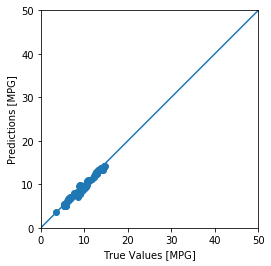

In [46]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

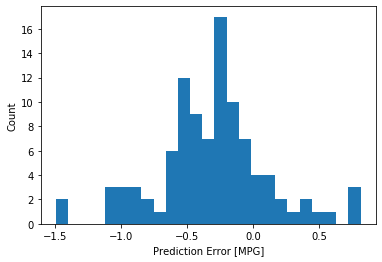

In [47]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [48]:
normed_test_data.head()

,time,mph,TIM
9,-1.647525,0.081737,0.662073
25,-1.524279,-0.625101,-0.897129
28,-1.506673,-0.271682,-0.897129
31,-1.489066,0.485645,-0.451642
32,-1.481520,-0.978521,-0.897129


In [52]:
test_dataset_path = "./test_dataset_mileage.csv"

In [55]:
column_names = ['time','mph','TIM','mpg_us']
# dataset = pd.read_csv(dataset_path, header=[1,2,3,4], squeeze = True)
# testdataset = pd.read_csv(dataset_path, index_col="time", squeeze = True)
testdataset = pd.read_csv(test_dataset_path, usecols=column_names, squeeze = True)
testdataset.head()

ValueError: Usecols do not match columns, columns expected but not found: ['mpg_us']